#Part 1: Text Processing and Exploratory Data Analysis

##PART 1: Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
import string
import re

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Introduce your path to fashion_products_dataset.json

# Pau Path
# docs_path = '/content/drive/MyDrive/4 curs/Recuperació de la info/Final Project/fashion_products_dataset.json'

# Marc Path
#docs_path = '/content/drive/MyDrive/Final Project/fashion_products_dataset.json'

# Clara Path
docs_path = '/content/drive/MyDrive/4t/Recuperació de la Informació i Anàlisi de la Web/Final Project/fashion_products_dataset.json'

# Teacher Path - UPDATE WITH YOUR PATH
#docs_path =

In [ ]:
# Load the JSON data into a DataFrame
df = pd.read_json(docs_path)

display(df.head())

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              28080 non-null  object        
 1   actual_price     28080 non-null  object        
 2   average_rating   28080 non-null  object        
 3   brand            28080 non-null  object        
 4   category         28080 non-null  object        
 5   crawled_at       28080 non-null  datetime64[ns]
 6   description      28080 non-null  object        
 7   discount         28080 non-null  object        
 8   images           28080 non-null  object        
 9   out_of_stock     28080 non-null  bool          
 10  pid              28080 non-null  object        
 11  product_details  28080 non-null  object        
 12  seller           28080 non-null  object        
 13  selling_price    28080 non-null  object        
 14  sub_category     28080 non-null  objec

**1.** In this section, we will prepare the text data for analysis. This involves several key steps:

  1.  **Removing stop words**: Eliminating common words like "the", "a", and "is" that don't add much meaning.
  2.  **Tokenization**: Breaking down the text into individual words or tokens.
  3.  **Removing punctuation marks**: Cleaning the text by getting rid of symbols like commas, periods, and exclamation points.
  4.  **Stemming**: Reducing words to their root form (e.g., "running" becomes "run").
  5.  **Other preprocessing**: We will also consider other steps like converting text to lowercase and handling potential special characters.


In [ ]:
def token_cleaning_text(text):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    #put everything in lowercase
    text=  text.lower()
    #get rid of punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    #remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    #tokenize the sentence
    text=  text.split()
    #filter words to delete stop words and stemming them
    text=[word for word in text if word not in stop_words]
    text=[stemmer.stem(word) for word in text]
    return text

In [ ]:
#apply the token_cleaning_text function to each value in the 'title' and 'description' columns and store the cleaned version in a new column
df['cleaned_title'] = df['title'].apply(token_cleaning_text)
df['cleaned_description'] = df['description'].apply(token_cleaning_text)

#combine the cleaned title and cleaned description columns into a single text field
df['cleaned_title_description'] = df['cleaned_title'] + df['cleaned_description']

display(df[['title', 'cleaned_title', 'description', 'cleaned_description', 'cleaned_title_description']].head())

,title,cleaned_title,description,cleaned_description,cleaned_title_description
0,Solid Women Multicolor Track Pants,"[solid, women, multicolor, track, pant]",Yorker trackpants made from 100% rich combed c...,"[yorker, trackpant, made, 100, rich, comb, cot...","[solid, women, multicolor, track, pant, yorker..."
1,Solid Men Blue Track Pants,"[solid, men, blue, track, pant]",Yorker trackpants made from 100% rich combed c...,"[yorker, trackpant, made, 100, rich, comb, cot...","[solid, men, blue, track, pant, yorker, trackp..."
2,Solid Men Multicolor Track Pants,"[solid, men, multicolor, track, pant]",Yorker trackpants made from 100% rich combed c...,"[yorker, trackpant, made, 100, rich, comb, cot...","[solid, men, multicolor, track, pant, yorker, ..."
3,Solid Women Multicolor Track Pants,"[solid, women, multicolor, track, pant]",Yorker trackpants made from 100% rich combed c...,"[yorker, trackpant, made, 100, rich, comb, cot...","[solid, women, multicolor, track, pant, yorker..."
4,"Solid Women Brown, Grey Track Pants","[solid, women, brown, grey, track, pant]",Yorker trackpants made from 100% rich combed c...,"[yorker, trackpant, made, 100, rich, comb, cot...","[solid, women, brown, grey, track, pant, yorke..."


**2.** We will store the important attributes in a array for future returning operations.

In [ ]:
important_attributes = [
    'pid',
    'title',
    'description',
    'brand',
    'category',
    'sub_category',
    'product_details',
    'seller',
    'out_of_stock',
    'selling_price',
    'discount',
    'actual_price',
    'average_rating',
    'url'
]

#keep only the important attributes for retrieval
df_important_attributes = df[important_attributes].copy()

display(df_important_attributes.head())

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
3,TKPFCZ9ESZZ7YWEF,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
4,TKPFCZ9EVXKBSUD7,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...


**3.** We will start by separating the different fields that we have in product_details. We will create a new attribute called product_{attribute} for each of them.

In [ ]:
def extract_product_detail(product_details_list, key):
    if isinstance(product_details_list, list):
        for detail_dict in product_details_list:
            if isinstance(detail_dict, dict) and key in detail_dict:
                return detail_dict[key]
    # return None if the key is not found
    return None

#possible product attributes
producte_attributes = ["Style Code", "Closure", "Pockets", "Fabric", "Pattern", "Color"]

#create new columns by applying the extraction function
for attribute in producte_attributes:
    df[f'product_{attribute.lower().replace(" ", "_")}'] = df['product_details'].apply(lambda x: extract_product_detail(x, attribute))

#display the new columns along with the original product_details
display(df[['product_details'] + [f'product_{key.lower().replace(" ", "_")}' for key in producte_attributes]].head())

,product_details,product_style_code,product_closure,product_pockets,product_fabric,product_pattern,product_color
0,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",1005COMBO2,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
1,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",1005BLUE,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,Blue
2,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",1005COMBO4,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
3,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",1005COMBO3,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
4,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",1005COMBO1,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,"Brown, Grey"


In [ ]:
#number of unique values for each column
unique_categories = df['category'].nunique()
unique_subcategories = df['sub_category'].nunique()
unique_brands = df['brand'].nunique()
unique_sellers = df['seller'].nunique()
unique_style_codes = df['product_style_code'].nunique()
unique_closures = df['product_closure'].nunique()
unique_pockets = df['product_pockets'].nunique()
unique_fabrics = df['product_fabric'].nunique()
unique_patterns = df['product_pattern'].nunique()
unique_colors = df['product_color'].nunique()

print(f"Number of unique categories: {unique_categories}")
print(f"Number of unique sub-categories: {unique_subcategories}")
print(f"Number of unique brands: {unique_brands}")
print(f"Number of unique sellers: {unique_sellers}")
print(f"Number of unique style codes: {unique_style_codes}")
print(f"Number of unique closures: {unique_closures}")
print(f"Number of unique pockets: {unique_pockets}")
print(f"Number of unique fabrics: {unique_fabrics}")
print(f"Number of unique patterns: {unique_patterns}")
print(f"Number of unique colors: {unique_colors}")

Number of unique categories: 4
Number of unique sub-categories: 24
Number of unique brands: 325
Number of unique sellers: 535
Number of unique style codes: 23263
Number of unique closures: 57
Number of unique pockets: 112
Number of unique fabrics: 244
Number of unique patterns: 118
Number of unique colors: 352


In [ ]:
#unique values for category
for col in ['category', 'sub_category', 'brand', 'seller',
            'product_style_code', 'product_closure', 'product_pockets',
            'product_fabric', 'product_pattern', 'product_color']:
    print(f"Unique values for {col}:")
    print(df[col].unique()[:10])
    print("-" * 40)

Unique values for category:
['Clothing and Accessories' 'Bags, Wallets & Belts' 'Footwear' 'Toys']
----------------------------------------
Unique values for sub_category:
['Bottomwear' 'Clothing Accessories' 'Winter Wear' 'Raincoats' 'Topwear'
 'Innerwear and Swimwear' 'Kurtas, Ethnic Sets and Bottoms'
 'Blazers, Waistcoats and Suits' 'Tracksuits' 'Sleepwear']
----------------------------------------
Unique values for brand:
['York' 'ANGI' '' 'Man' 'TRANSPERAN' 'DISCOUNT OUTL' 'adidas Origina'
 'Fresh Fe' 'SayItLo' 'ShreeR']
----------------------------------------
Unique values for seller:
['Shyam Enterprises' 'SH ENTERPRISE' 'NextEdgeRetails' '' 'SHAKTICREATION'
 'FLIPKAT fashion' 'S P TRADERS' 'RetailNet'
 'RetailNet4.5Seller changed. Check for any changes in pricing and related informatio'
 'RAVR India']
----------------------------------------
Unique values for product_style_code:
['1005COMBO2' '1005BLUE' '1005COMBO4' '1005COMBO3' '1005COMBO1'
 '1005COMBO12' '1005NAVI' '1005DSKIN

Process the fields (category, sub_category, fabric, pattern, and color) by cleaning and merging them with the main token list for TF-IDF future analysis.

In [ ]:
for col in ['category', 'sub_category', 'product_fabric', 'product_pattern', 'product_color']:
    #replace NaN, None, or empty values with empty string before applying the function
    df[col] = df[col].fillna('').astype(str).replace('None', '').replace('nan', '')
    df[f'cleaned_{col}'] = df[col].apply(token_cleaning_text)

df['cleaned_title_description_extra_fields'] = (
    df['cleaned_title_description']
    + df['cleaned_category']
    + df['cleaned_sub_category']
    + df['cleaned_product_fabric']
    + df['cleaned_product_pattern']
    + df['cleaned_product_color']
)

display(df[['cleaned_category', 'cleaned_sub_category', 'cleaned_product_fabric', 'cleaned_product_pattern', 'cleaned_product_color', 'cleaned_title_description_extra_fields']].head())

,cleaned_category,cleaned_sub_category,cleaned_product_fabric,cleaned_product_pattern,cleaned_product_color,cleaned_title_description_extra_fields
0,"[cloth, accessori]",[bottomwear],"[cotton, blend]",[solid],[multicolor],"[solid, women, multicolor, track, pant, yorker..."
1,"[cloth, accessori]",[bottomwear],"[cotton, blend]",[solid],[blue],"[solid, men, blue, track, pant, yorker, trackp..."
2,"[cloth, accessori]",[bottomwear],"[cotton, blend]",[solid],[multicolor],"[solid, men, multicolor, track, pant, yorker, ..."
3,"[cloth, accessori]",[bottomwear],"[cotton, blend]",[solid],[multicolor],"[solid, women, multicolor, track, pant, yorker..."
4,"[cloth, accessori]",[bottomwear],"[cotton, blend]",[solid],"[brown, grey]","[solid, women, brown, grey, track, pant, yorke..."


**4.** The fields out_of_stock, selling_price, discount, actual_price, and average_rating were converted to their appropriate data types to enable accurate filtering and numerical operations.

In [ ]:
#convert 'actual_price', 'selling_price and 'average_rating' to numeric, handling commas and null values
df['actual_price'] = df['actual_price'].str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df['selling_price'] = df['selling_price'].str.replace(',', '', regex=False)
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

print(df[['actual_price', 'selling_price', 'average_rating']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual_price    27303 non-null  float64
 1   selling_price   28078 non-null  float64
 2   average_rating  25819 non-null  float64
dtypes: float64(3)
memory usage: 658.3 KB
None


In [ ]:
#clean and convert the discount
df['discount'] = df['discount'].str.replace(' off', '', regex=False)
df['discount'] = df['discount'].str.replace('%', '', regex=False)
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
df['discount'] = df['discount'].astype('Int64')

print(df['discount'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 28080 entries, 0 to 28079
Series name: discount
Non-Null Count  Dtype
--------------  -----
27225 non-null  Int64
dtypes: Int64(1)
memory usage: 246.9 KB
None


We can see that some values have null values now we transformed to numerical some data that was stored as strings. For example the discount that now have null values were initially as an empty string. We can see what they looked like before the cleaning.

In [ ]:
#find rows where 'discount' is null after conversion
null_discount_rows = df[df['discount'].isnull()]

#display these rows, including the original 'discount' column from df_important_attributes
display(df_important_attributes.loc[null_discount_rows.index, ['title', 'discount', 'actual_price', 'selling_price']].head(20))

,title,discount,actual_price,selling_price
1705,Solid Women Polo Neck Blue T-Shirt,,,"1,099"
1734,Men Striped Ankle Length,,,499
1891,Solid Women Grey Track Pants,,,"1,499"
1922,Full Sleeve Solid Men Sweatshirt,,,"2,399"
1949,Solid Men Grey Track Pants,,,"1,499"
1950,Solid Men Polo Neck Green T-Shirt,,,"1,299"
1953,Full Sleeve Solid Men Sports Jacket,,,"3,699"
1958,Solid Men Polo Neck Green T-Shirt,,,"1,599"
1964,Original Cotton Half Cushion Women Ankle Lengt...,,,399
2020,Printed Women Round Neck Dark Blue T-Shirt,,,"3,999"


For more cleaned data we will assume that there was no discount so we will just set the actual_price to have the same value as the selling_price and we will put the discount to 0.

In [ ]:
#fill null discount values with 0
df['discount'] = df['discount'].fillna(0)

#for rows where discount was null (and now 0), set actual_price equal to selling_price
df.loc[df['discount'] == 0, 'actual_price'] = df['selling_price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   _id                                     28080 non-null  object        
 1   actual_price                            28078 non-null  float64       
 2   average_rating                          25819 non-null  float64       
 3   brand                                   28080 non-null  object        
 4   category                                28080 non-null  object        
 5   crawled_at                              28080 non-null  datetime64[ns]
 6   description                             28080 non-null  object        
 7   discount                                28080 non-null  Int64         
 8   images                                  28080 non-null  object        
 9   out_of_stock                            28080 non-

##PART 2: Data analysis


### Textual data analysis

####In this section we examine the cleaned texts by analyzing word count distributions, determining vocabulary size, and creating word clouds to visualize frequent terms in titles and descriptions.

Word count distribution: here we will count the words in title and description and see around what values do they fall.


In [ ]:
title_len = df['cleaned_title'].apply(len)
description_len = df['cleaned_description'].apply(len)

#we will put it one next to the other to compare easily the values
combined_description = pd.concat([title_len.describe(), description_len.describe()], axis=1)
display(combined_description)

,cleaned_title,cleaned_description
count,28080.000000,28080.000000
mean,6.225819,18.490135
std,1.946551,26.232203
min,1.000000,0.000000
25%,5.000000,0.000000
50%,6.000000,9.000000
75%,7.000000,28.000000
max,31.000000,556.000000


What we can see from the counting:
The title got a mean of 6.2 words. For text based searching engines we might need more than that. Mixing the title and description will help to get better results with the queries as the description is around 18.5 words long. In great part of the cases (at least in more than 50%) this will be shorter so we will still have a short text for each line. More information should be added, like the color or the brand (as we did previously).


#### Determine vocabulary size:


We will store all the words that appear in the title and description and we will store them in a set. When we can see the size and we will have it for future usage, for exampel for future tf-idf models.



In [ ]:
vocabulary = set()

for tokens in df['cleaned_title']:
    vocabulary.update(tokens)

for tokens in df['cleaned_description']:
    vocabulary.update(tokens)

vocabulary_size = len(vocabulary)
print(f"Total vocabulary size: {vocabulary_size}")

Total vocabulary size: 6136


#### Word clouds for the cleaned title and description columns.



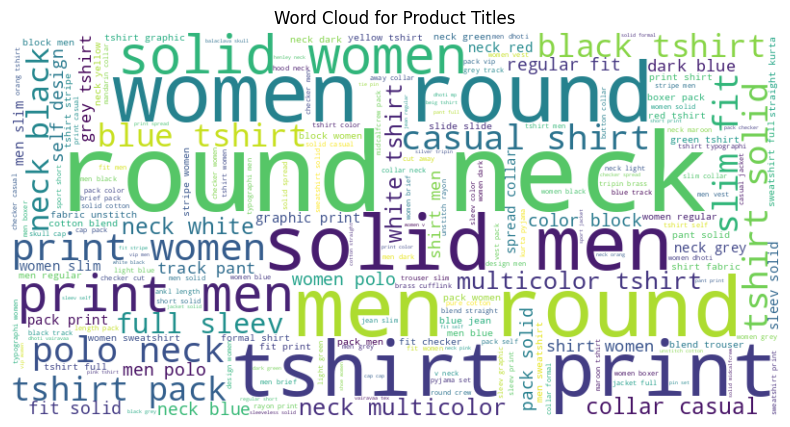

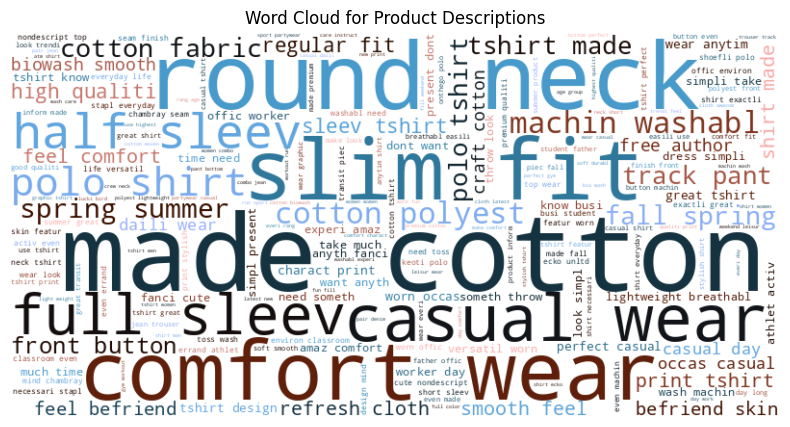

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combine all cleaned title tokens into a single string
title_text = " ".join([" ".join(tokens) for tokens in df['cleaned_title']])

#create and generate the word cloud for titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

#display the word cloud for titles
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Titles')
plt.show()

#combine all cleaned description tokens into a single string
description_text = " ".join([" ".join(tokens) for tokens in df['cleaned_description']])

# create and generate the word cloud for descriptions
description_wordcloud = WordCloud(width=800, height=400, colormap="berlin", background_color='white').generate(description_text)

#display the word cloud for descriptions
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions')
plt.show()

We can see that the most common words are those that describe materials and characteristics. Some of the most used words are in both title and description. We can also notice that rather than have words alone what we see more repeated is two-concepts to define types of clothes or characteristics of it.

###Numerical data analysis
####In this section, we will perform some exploratory data analysis on the numerical variables in the dataset.


First, we will use boxplots to visualize the distribution and detect outliers, and distribution plots to show the frequency of values. This will help us identify patterns, extreme values, and better understand the behavior of prices, discounts, and ratings.

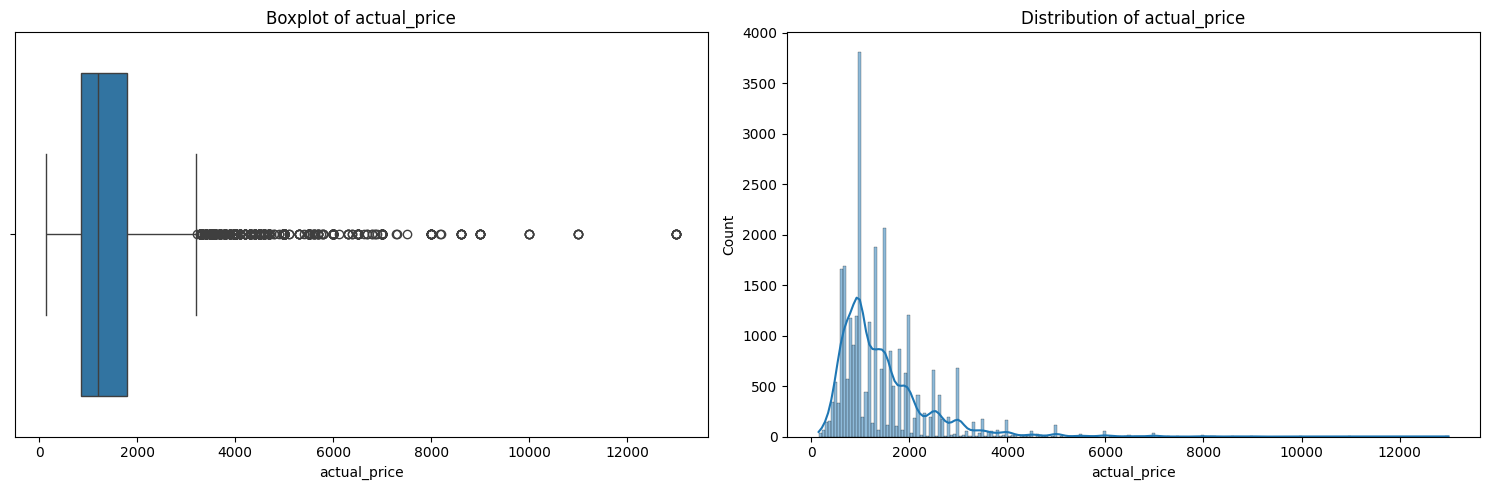

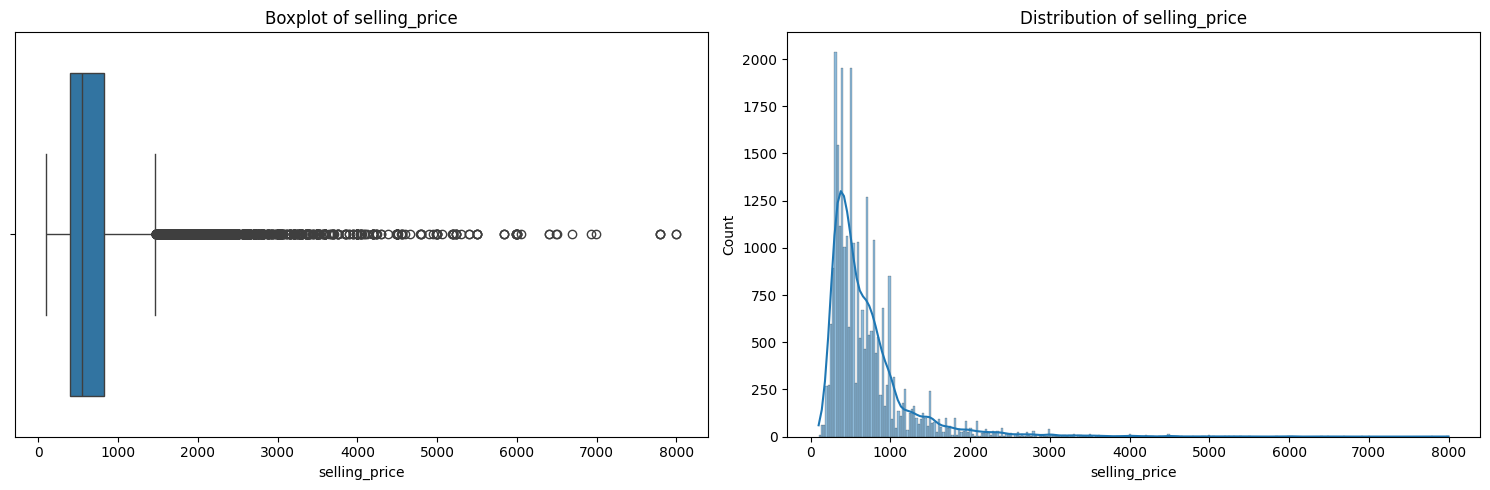

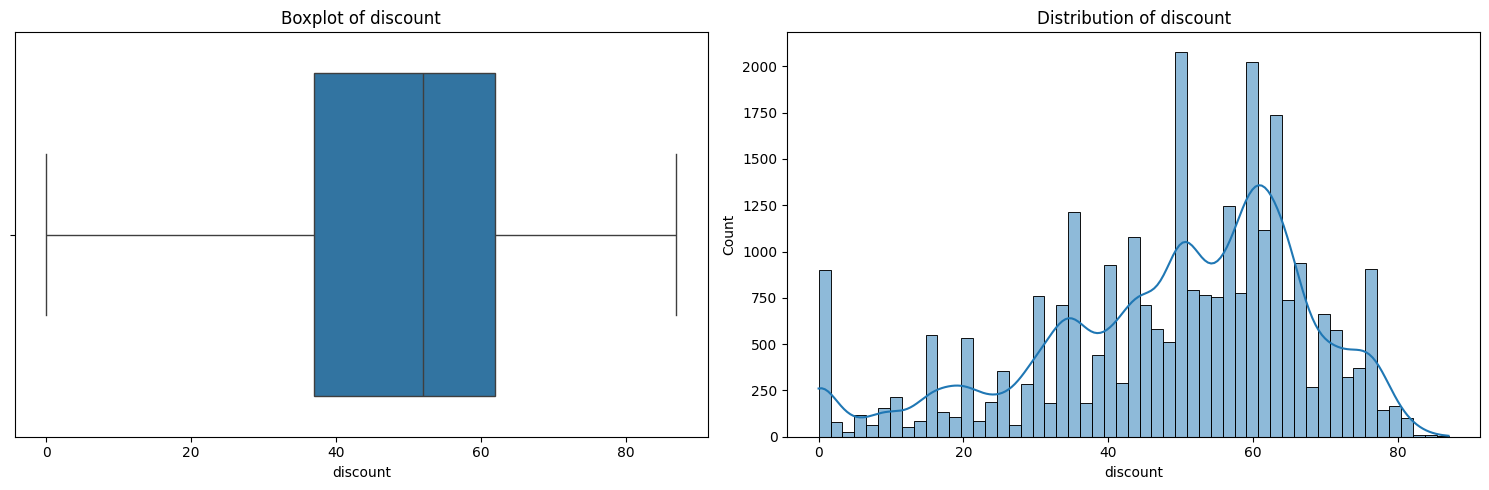

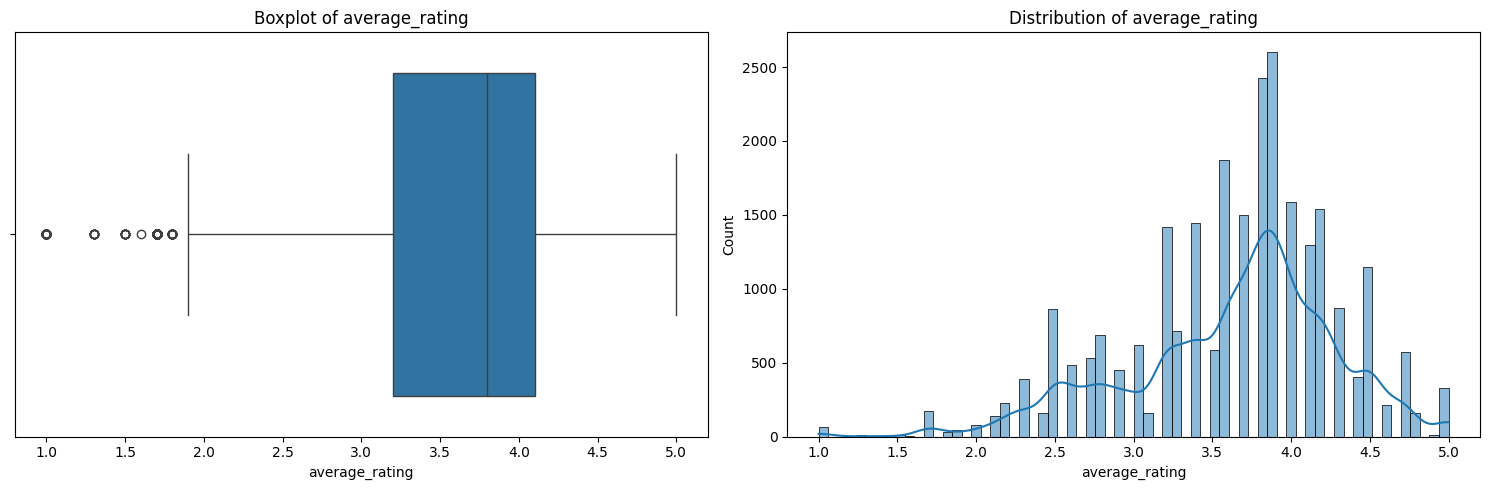

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns
numerical_cols = ['actual_price', 'selling_price', 'discount', 'average_rating']

# Create boxplots and distribution plots for each numerical column
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    # Distribution plot
    sns.histplot(df[col].dropna(), kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

The distribution of all four numerical attributes are more or less continuous, they don't have a clear discrete distribution.

Almost every item in the dataset has a discount. We can see that less than 1000 got 0% discount and that most of them is concentrated between values from 40% to 60%

Both actual and selling prices show wide ranges, but there is a clear clustering around moderate price levels.



Next, we identify the products with the highest ratings to understand which items receive the best user feedback.



In [ ]:
#sort by average_rating in descending order
top_rated_products = df.sort_values(by='average_rating', ascending=False)

#display top 10 with relevant columns
display(top_rated_products[['title', 'brand', 'average_rating', 'selling_price']].head(10))

,title,brand,average_rating,selling_price
27767,Solid Women Round Neck Blue T-Shirt,Oka,5.0,385.0
12332,Printed Women Hooded Neck Black T-Shirt,ATTIITU,5.0,549.0
12279,Printed Women Hooded Neck Grey T-Shirt,ATTIITU,5.0,909.0
23852,Graphic Print Men Round Neck Blue T-Shirt,Free Authori,5.0,519.0
12235,"Solid Women Round Neck White, Black T-Shirt",ATTIITU,5.0,649.0
12242,ATTIITUDE Men Vest,,5.0,937.0
12243,ATTIITUDE Men Vest,,5.0,937.0
8477,Women Trunks,V,5.0,420.0
1923,Self Design Women Black Track Pants,REEB,5.0,2659.0
18049,Printed Women Round Neck White T-Shirt,yellowvib,5.0,870.0


These top-rated products represent the most appreciated items in the catalog. We can not know how relevant this ratings are. As we don't have any information about where this rating comes from. We do not know how many ratings there are under this average, if they are rating the overall experience, which involves the seller; or if it's just a rating of the product, where it would only involve the brand.
We cannot make final conclusions but we can see that some brands got more than one product with good ratings.

We will look more into it in the following cells.

We analyze the brands with the lowest selling price to identify the most affordable options and the more expensive ones.



In [ ]:
#group by 'brand' and calculate the average selling price and product count
brand_price_stats = df.groupby('brand').agg(
    average_selling_price=('selling_price', 'mean'),
    product_count=('brand', 'count')
)

#sort by average_selling_price in ascending order for lowest prices
lowest_priced_brands = brand_price_stats.sort_values(by='average_selling_price', ascending=True).head(5)

#display the 5 most affordable brands with their average selling price and product count
print("Top 5 Most Affordable Brands by Average Selling Price:")
display(lowest_priced_brands)

#sort by average_selling_price in descending order for highest prices
highest_priced_brands = brand_price_stats.sort_values(by='average_selling_price', ascending=False).head(5)

#display the 5 most expensive brands by Average Selling Price
print("\nTop 5 Most Expensive Brands by Average Selling Price:")
display(highest_priced_brands)

Top 5 Most Affordable Brands by Average Selling Price:


,average_selling_price,product_count
brand,,
ina gro,120.0,3
Mohan Reta,140.0,1
K J TRADE,149.0,1
your shopping sto,158.5,2
Kno,173.0,1



Top 5 Most Expensive Brands by Average Selling Price:


,average_selling_price,product_count
brand,,
G,4012.375000,56
Lar,3724.000000,8
Lev,2316.880000,275
Social Pige,1999.000000,3
REEBOK CLASSI,1723.506667,75


What we can conclude of this analisys is that there are very expensive brand and others that are way more cheap. We have to keep in mind this when developing the search engine, to give more weight to certain types of brands.

Now, we are going to identify the products with the highest and lowest discount percentage to understand the most prominent offers.


In [ ]:
#sort by discount in descending order
highest_discount_products = df.sort_values(by='discount', ascending=False)

#display top 10 with relevant columns
display(highest_discount_products[['title', 'brand', 'discount', 'selling_price']].head(10))
display(highest_discount_products[['title', 'brand', 'discount', 'selling_price']].tail(10))

,title,brand,discount,selling_price
906,Printed Women Round Neck White T-Shirt,Jack Roy,87,128.0
903,Printed Women Round Neck White T-Shirt,Jack Roy,86,136.0
902,Printed Women Round Neck Grey T-Shirt,Jack Roy,86,136.0
18249,Printed Men Round Neck Multicolor T-Shirt (Pa...,yellowvib,85,449.0
18093,Printed Men Collared Neck Multicolor T-Shirt,yellowvib,84,230.0
3102,Color Block Women Round Neck Green T-Shirt,REF,84,228.0
91,nu-Lite Satin Tie & Cufflink (Red),,84,499.0
18017,Printed Men Mandarin Collar Blue T-Shirt,yellowvib,84,282.0
9811,Solid Balclava Cap,Gracew,84,228.0
18016,Printed Women Round Neck Blue T-Shirt,yellowvib,84,280.0


,title,brand,discount,selling_price
13241,Men Brief (Pack of 5),VIKING.INE,0,699.0
13240,Men Brief (Pack of 5),VIKING.INE,0,699.0
3013,Full Sleeve Graphic Print Women Sweatshirt,AXMA,0,1395.0
5768,Wb-907 Regular Men Green Jeans,Wab,0,1299.0
5767,Slim Men Grey Jeans,Wab,0,1599.0
15879,Graphic Print Women Round Neck Black T-Shirt,HUMANITY ORIGINA,0,699.0
3071,Full Sleeve Self Design Men Sweatshirt,AXMA,0,1475.0
3070,Solid V Neck Casual Women Grey Sweater,AXMA,0,1295.0
3050,Solid Women Round Neck Red T-Shirt,AXMA,0,495.0
13246,Women Brief (Pack of 5),VIKING.INE,0,699.0


We can see that the same brand offers the highest discounts, around 85%, but for now, we cannot draw any further conclusions.

We can look if the sub-categories are attribuated to a category or if they are all mixed. We will do this to know if categories and subcategories are associated.

In [ ]:
#create a cross-tabulation of category and sub_category
category_subcategory_crosstab = pd.crosstab(df['sub_category'], df['category'])

#display the cross-tabulation
display(category_subcategory_crosstab)

category,"Bags, Wallets & Belts",Clothing and Accessories,Footwear,Toys
sub_category,,,,
"Blazers, Waistcoats and Suits",0,103,0,0
Bottomwear,0,3666,0,0
"Brand Trunk Bags, Wallets & Belts",1,0,0,0
Clothing Accessories,0,1742,0,0
Crocks Club Clothing and Accessories,0,15,0,0
Fabrics,0,534,0,0
INSPIRE Clothing and Accessories,0,4,0,0
Innerwear and Swimwear,0,1762,0,0
Inspire Clothing and Accessories,0,23,0,0


We can see that each sub category is attribuated to a single category, so this two attributes could be mixed so we avoid considering imposible combinations of category and subcategory.

In the following cells, we explore which sellers and brands have the most presence in the catalog.



In [ ]:
top_sellers_by_product_count = df['seller'].value_counts().head(10)
print("Top 10 Sellers by Product Count:")
display(top_sellers_by_product_count)


Top 10 Sellers by Product Count:


,count
seller,
,1643
RetailNet,1411
SandSMarketing,887
BioworldMerchandising,842
ARBOR,783
Keoti,660
AFFGARMENTS,587
Black Beatle,548
AMALGUS ENTERPRISE,477


We see that there are big sellers in the dataset. And also that some of them got null values in this column.

Let's see how brands are puntuated and how relevant they are. To do this we can group by 'brand' and calculate the mean of 'average_rating', then display the top 10 to have an idea. We can also do the same in the inverse, order them by their average rating and also see how many times they appear.



In [ ]:
#group by 'brand' and calculate the number of products and the average rating
brand_stats = df.groupby('brand').agg(
    product_count=('brand', 'count'),
    average_rating=('average_rating', 'mean')
).sort_values(by='product_count', ascending=False)

#display the top 10 brands by product count with their average rating
print("\nTop 10 Brands by Product Count and Average Rating:")
display(brand_stats.head(10))

#group by 'brand' and calculate the mean of 'average_rating', then display the top 10.
top_brands_by_average_rating = df.groupby('brand').agg(
    average_rating=('average_rating', 'mean'),
    product_count=('brand', 'count')
).sort_values(by='average_rating', ascending=False).head(10)

print("\nTop 10 Brands by Average Rating:")
display(top_brands_by_average_rating)


Top 10 Brands by Product Count and Average Rating:


,product_count,average_rating
brand,,
,2009,3.711452
ECKO Unl,951,2.705660
Free Authori,860,3.906835
ARBO,806,4.101500
REEB,802,4.012531
Pu,798,4.058438
True Bl,793,3.460536
Keo,660,3.820455
Amp,585,3.414872



Top 10 Brands by Average Rating:


,average_rating,product_count
brand,,
VARTe,5.000000,44
MILD,5.000000,9
VIKING.INE,4.640000,7
SORA,4.609459,74
COL,4.550000,2
Modest Ci,4.500000,1
PixF,4.462195,429
Cots,4.444043,277
GYMBROTHE,4.407143,28


We can see we have different types of brands in the top of the ratings.


Finally, we will analyze and report the distribution of out_of_stock status to understand how much of the offer is currently accessible.


In [ ]:
#calculate the value counts for the 'out_of_stock' column
out_of_stock_counts = df['out_of_stock'].value_counts()

#print the value counts
print("Distribution of Out of Stock Status (Counts):")
display(out_of_stock_counts)

#calculate the percentage distribution of 'out_of_stock' status
out_of_stock_percentage = df['out_of_stock'].value_counts(normalize=True) * 100

#print the percentage distribution
print("\nDistribution of Out of Stock Status (Percentage):")
display(out_of_stock_percentage)

Distribution of Out of Stock Status (Counts):


,count
out_of_stock,
False,26436
True,1644



Distribution of Out of Stock Status (Percentage):


,proportion
out_of_stock,
False,94.145299
True,5.854701


Most products remain in stock, although a notable portion is unavailable.
This feature is very important when ordering the items. We should prioritize items that are in stock over items that are out of stock when ordering them.
